$$ \huge{Домашнее \space задание \space № \space 4}$$


$$\large{Федоров \space Павел\space Сергеевич \space 172}$$

$$Прикладная \space статистика \space в \space машинном \space обучении$$

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

## Задание 2

Пусть $T_n=\bar{X}_n^2, \mu=E(X_1), \alpha_k=\int{(x-\mu)^k}dF(x)$ и $\hat{\alpha}_k=\frac{1}{n}\sum_{i=1}^{n}{(X_i-\bar{X}_n)^k}$. Докажите, что оценка дисперсии функционала $T_n$ с помощью бустрепа равна:

$$v_{boot}=\frac{4 \bar{X}_n^2 \hat{\alpha}_2}{n}+\frac{4 \bar{X}_n \hat{\alpha}_3}{n^2} + \frac{\hat{\alpha}_4}{n^3} + \frac{\hat{\alpha}_2^2(2n-3)}{n^3}$$

Пусть 
$$S_n = \frac{1}{n}\sum_{i=1}^{n}{(X_i-\bar{X}_n)} = 0$$
тогда:

$$\bar{X_n} = S_n + \bar{X}_n = \frac{1}{n}\sum_{i=1}^{n}{(X_i-\bar{X}_n)} + \bar{X}_n $$

$$Var(\bar{X}_n^2) = E(\bar{X}_n^4) - (E(\bar{X}_n^2))^2$$

$$E(\bar{X}_n^4) = E(S_n+ \bar{X}_n)^4 = E(S_n^4 + 4\bar{X}_nS_n^3 + 6\bar{X}_n^2 S_n^2 + 4\bar{X}_n^3 S_n + \bar{X}_n^4) \rightarrow $$ $$E(S_n^4) + 4\bar{X}_nE(S_n^3) + 6\bar{X}_n^2 E(S_n^2) +\bar{X}_n^4$$


$$E(S_n^4) = E(\frac{1}{n^4}(\sum_{i=1}^{n}{(X_i-\bar{X}_n)^4} + \sum\sum(X_i-\bar{X}_n)^2(X_j-\bar{X}_n)^2)) =$$
$$=\frac{\hat{\alpha}_4}{n^3} + \frac{\hat{\alpha}_2^2 3(n-1)}{n^3}$$

$$E(S_n^3)=\frac{1}{n^3}\sum_{i=1}^{n}{(X_i-\bar{X}_n)^3} = \frac{\hat{\alpha}_3}{n^2} $$

$$E(S_n^2)=\frac{1}{n^2}\sum_{i=1}^{n}{(X_i-\bar{X}_n)^2} = \frac{\hat{\alpha}_2}{n} $$

Следовательно:

$$Var(\bar{X}_n^2) = \frac{4 \bar{X}_n^2 \hat{\alpha}_2}{n}+\frac{4 \bar{X}_n \hat{\alpha}_3}{n^2} + \frac{\hat{\alpha}_4}{n^3} + \frac{\hat{\alpha}_2^2(2n-3)}{n^3}$$

## Задание 3

Пусть есть выборка из 11 элементов: $$x_1<x_2<x_3<x_4<x_5<x_6<x_7<x_8<x_9<x_{10}<x_{11}$$ Оцениваемая статистика $\theta$ - медиана.

1) Покажите, что для оценки $\hat{\theta}$ по бутстрепной выборке верно следующее:

$$P(\hat{\theta}>x_i)=\sum_{j=0}^{5}Bi(j,n,\frac{i}{n}),$$

где $Bi(j,n,\frac{i}{n}) = C_n^jp^j(1-p)^{n-j}$.

$P(\hat{\theta}>x_i)$ - вероятность того, что в бутстреп выборку попало не больше 5 элементов $x_{k}$. Вероятность можно переписать как вероятность появления пяти успехов в схемме бернулли из n экспериментов, где шанс успеха равен $\frac{i}{n}$. Тогда

$$P(\hat{\theta}>x_i)= C_n^jp^j(1-p)^{n-j}$$

2) Покажите, что оценка $\hat{\theta}$ по  бутстрепной выборке равно $x_i$ с вероятностью:

$$P(\hat{\theta} = x_i) = \sum_{j=0}^{5}(Bi(j,n,\frac{i-1}{n})-Bi(j,n,\frac{i}{n}))$$

Так как неравество уже строгое, вместо $\frac{i}{n}$Б, вероятность выбрать нужный элемент будет равна $\frac{i-1}{n}$

$$P(\hat{\theta} = x_i) = \sum_{j=0}^{5}(Bi(j,n,\frac{i-1}{n})-Bi(j,n,\frac{i}{n})) = P(\hat{\theta}>x_{i-1})-P(\hat{\theta}>x_{i})=$$

$$=1 - P(\hat{\theta}\leq x_{i-1})-1 +P(\hat{\theta}\leq x_{i}) = P(\hat{\theta}\leq x_{i})-P(\hat{\theta} \leq x_{i-1})=$$

$$=P(\hat{\theta} \in (x_{i-1}, x_i) = P(\hat{\theta}=x_i)$$


3) Используя результат пункта 1 выведите 90% бутстрепный доверительный интервал для медианы.


In [2]:
from scipy.stats import binom

def bern_sum(i):
    tmp = []
    for j in range(6):
        tmp.append(binom.pmf(j, 11, i / 11))

    return np.sum(tmp)

def prob_int(x1, x2):
    l = bern_sum(x1)
    h = bern_sum(x2)
    prob = bern_sum(x1 - 1) - l
    
    return l + prob - h

for i in range(1, 12):
    for j in range(i + 1, 12):
        prob = prob_int(i, j)
        if prob >= 0.89 and prob <= 0.95:
            print('[{}, {}] - probability = {}'.format(i, j, prob))

[1, 8] - probability = 0.9487534039820792
[2, 8] - probability = 0.9485793115206891
[3, 8] - probability = 0.9415462861954275
[4, 8] - probability = 0.897506807964159
[4, 9] - probability = 0.9415462861954277
[4, 10] - probability = 0.9485793115206897
[4, 11] - probability = 0.9487534039820799


Лучше всего подходят [3, 8], [4, 8] и [4, 9]

## Задание 4

Рассмотрим данные, описывающие скорости 82 галактик из созвездия Северной Короны. Мы хотим узнать, есть ли пустоты или суперкластеры в данной части вселенной. Одним из свидетельств является мельтимодальность распределения скоростей галактик. Другими словами, нам необходимо проверить гипотезу унимодальности расперделение т.е.:

$$H_0: n_{mode}(p)=1  vs  H_a: n_{mode}(p)>1$$

Плотность распределения будем оценивать непараметрическим ядерным методом:

$$\hat{p}_{K,h}(x)=\frac{1}{nh}\sum_{i=1}^{n}K(\frac{x-X_i}{h})$$

a) По данными найдите минимальное $\hat{h}_{uni}$, при котором распределение еще унимодально.
Найденнная $\hat{h}_{uni}$ является оценкой по данным для реальной $h_{uni}$. Если окажется, что $h_{uni}>\hat{h}_{uni}$, то это значит, что в реальности мод больше одной. Т.е. нулевая гипотеза отвергается на уровне значимости $\alpha$:

$$P(multimodal)=P(h_{uni}>\hat{h}_{uni})\leq\alpha$$

In [4]:
galaxies = pd.read_csv('galaxies.csv', index_col=0)
galaxies.head()

,dat
1,9172
2,9350
3,9483
4,9558
5,9775


In [5]:
galaxies['dat'].describe()

count       82.000000
mean     20828.170732
std       4563.757994
min       9172.000000
25%      19532.000000
50%      20833.500000
75%      23133.000000
max      34279.000000
Name: dat, dtype: float64

In [17]:
galaxies = galaxies.dat

In [94]:
def dens(data, x, h):
    return (np.exp(-((x - data) / h) ** 2 / 2 ) / np.sqrt(2 * np.pi)).sum() / (data.shape[0] * h) 

xs = np.linspace(2000, 50000, 1000)

def is_unimodal(data, h):
    p = np.array([dens(data, x, h) for x in xs])
    cnt = 0
    
    for i in range(len(p) - 2):
        if p[i - 1] < p[i] and p[i] > p[i + 1]:
            cnt += 1
    if cnt == 1:
        return True
    return False
        
def h_uni_min(data):    
    h_left = 100
    h_right = 10000
    h_min = 0

    while h_right - h_left > 0.01:
        h_min = (h_left + h_right) / 2
        if is_unimodal(data, h_min):
            h_right = h_min
        else:
            h_left = h_min
    return h_min

h_uni = h_uni_min(galaxies.values)
print('h_min = {}'.format(h_uni))

h_min = 3045.869731903076


b) Используя бутстреп оцените следующую величину:

$$\hat{P}(h_{uni}>\hat{h}_{uni}) \approx \frac{1}{B}\sum_{b=1}^B(\hat{h}_{uni}^b \geq \hat{h}_{uni})$$

Сэмплирование делайте из $\hat{p}_{K,\hat{h}_{uni}}(x)$, т.е. $X^* \sim X +\hat{h}_{uni}N(0,1)$, где $X$ - случайный элемент изначальной выборки. 


In [95]:
from sklearn.utils import resample
import scipy
from scipy.stats import norm

count = 0
n = 500

b = np.sqrt(np.var(galaxies) / (np.var(galaxies) + h_uni ** 2))
a = (1 - b) * galaxies.mean()

for b in range(n):
    boot = resample(galaxies.astype(float).values)
    
    boot += norm.rvs(size=galaxies.shape[0]) * h_uni
    boot = b * boot + a
    
    count += (h_uni_min(boot) > h_uni)

print('P(h_uni > hat_h_uni) = {}'.format(count / n))

P(h_uni > hat_h_uni) = 0.984


c) С каким уровнем значимости отвергается нулевая гипотеза?

**Ответ:** из пункта выше

## Задание 5

Датасет CD4 содержит информацию о 20 ВИЧ-инфецированных пациентах до и после года лечения на экспериментальном антивирусном лекарстве.

а) Для коэффициента корреляции Пирсона между данными до и после лечения посчитайте 95% доверительный интервал следующими методами: нормальный, перцентильный, центральный и t-бутстрап.

In [20]:
cd4 = pd.read_csv('cd4.csv', index_col = 0)
cd4.head()

,baseline,oneyear
1,2.12,2.47
2,4.35,4.61
3,3.39,5.26
4,2.51,3.02
5,4.04,6.36


In [21]:
coefs = []
for i in range(cd4.shape[0]):
    sample = resample(cd4.values)
    coefs.append(np.corrcoef(sample[:, 0], sample[:, 1])[0][1])

In [22]:
pearson = np.corrcoef(cd4['baseline'], cd4['oneyear'])[0][1]

In [23]:
left = pearson - norm.interval(0.95 / 2)[1] * np.std(coefs)
right = pearson + norm.interval(0.95 / 2)[1] * np.std(coefs)
print('Доверительный интервал для нормального: [{};{}]'.format(left, right))

Доверительный интервал для нормального: [0.6753407850033724;0.7709899507806881]


In [24]:
left = np.percentile(coefs, 0.05 / 2  * 100)
right = np.percentile(coefs, 0.95 / 2 * 100)
print('Для перцентильного: [{};{}]'.format(left, right))


Для перцентильного: [0.5758480803018922;0.7075074544270662]


In [25]:
left = 2 * pearson - np.percentile(coefs, 0.95 / 2 * 100)
right  = 2 * pearson - np.percentile(coefs, 0.05 / 2  * 100)
print('Для центрального: [{};{}]'.format(left, right))

Для центрального: [0.7388232813569943;0.8704826554821683]


In [26]:
left = pearson - np.sqrt((1 - pearson ** 2) / (cd4.shape[0] - 2)) * np.percentile(coefs, 0.95 / 2 * 100)
right = pearson - np.sqrt((1 - pearson ** 2) / (cd4.shape[0] - 2)) * np.percentile(coefs, 0.05 / 2  * 100)
print('Для t-bootstrap: [{};{}]'.format(left, right))

Для t-bootstrap: [0.6079876534983778;0.6294209623566092]


Теперь сделаем преобразование

In [27]:
coefs = np.array(coefs)
coefs = 1 / 2 * np.log((1 + coefs) / (1 - coefs))

In [28]:
left = pearson - norm.interval(0.95 / 2)[1] * np.std(coefs)
right = pearson + norm.interval(0.95 / 2)[1] * np.std(coefs)
print('Доверительный интервал с преобразованием для нормального: [{};{}]'.format(left, right))

Доверительный интервал с преобразованием для нормального: [0.6276872430552232;0.8186434927288373]


In [29]:
left = np.percentile(coefs, (0.05) / 2  * 100)
right = np.percentile(coefs, (1 - (0.05) / 2) * 100)
print('Для перцентильного: [{};{}]'.format(left, right))

Для перцентильного: [0.6569785473396776;1.1194696109930868]


In [30]:
left = 2 * pearson - np.percentile(coefs, (1 - (0.05) / 2) * 100)
right = 2 * pearson - np.percentile(coefs, (0.05) / 2  * 100)
print('Для центрального: [{};{}]'.format(left, right))

Для центрального: [0.3268611247909736;0.7893521884443828]


In [31]:
left = pearson - np.sqrt((1 - pearson ** 2) / (cd4.shape[0] - 2)) * np.percentile(coefs, (1 - (0.05) / 2) * 100)
right = pearson - np.sqrt((1 - pearson ** 2) / (cd4.shape[0] - 2)) * np.percentile(coefs, (0.05) / 2  * 100)
print('Для t-bootstrap: [{};{}]'.format(left, right))

Для t-bootstrap: [0.540922834162477;0.6162134382483738]


Здесь нормализация не сыграла роли, а только ухудшила ситацию.

b) Реализовать двойной бутстрап - над бутстрапными выборками, по которым считается r сделайте еще бутстрап для оценки $\sigma(r)$. Сравните дисперсии посчитанные аналитически и бустрапом.

In [32]:
coefs = []
sigmas = []
n = cd4.shape[0]
for i in range(n):
    smaple = resample(cd4.values)
    coef_list = []

    for j in range(cd4.shape[0]):
        sample_tmp = resample(smaple)
        coef_list.append(np.corrcoef(sample_tmp[:, 0], sample_tmp[:, 1])[0][1])
    
    sigmas.append(np.var(coef_list))
    coefs.append(np.corrcoef(smaple[:, 0], smaple[:, 1])[0][1])

left = pearson - np.sqrt(np.sum(sigmas) / n) * np.percentile(coefs, 0.95 / 2 * 100)
right = pearson - np.sqrt(np.sum(sigmas) / n) * np.percentile(coefs, 0.05 / 2  * 100)

print('Доверительный интервал для t-bootstrap: [{};{}]'.format(left, right))

Доверительный интервал для t-bootstrap: [0.6547816401800658;0.667850845220396]


In [33]:
print('Дисперсия {}'.format(np.var(sigmas)))

Дисперсия 3.3898009896101055e-05


Дисперсия уменьшилась, а доверительный интервал стал точнее.

с) После предыдущего пункта вым наверняка захотелось проверить все наши оценки на смещенность. Оцените смещение для коэффициента корреляции с помощью jackknife.

In [34]:
from scipy.special import erfinv

coefs = np.array(coefs)

sampled_coefs = np.empty([coefs.shape[0], coefs.shape[0]-1])
for i in range(coefs.shape[0]):
    sampled_coefs[i] = np.delete(coefs, i)

mean_j = np.mean(np.apply_along_axis(np.var, 1, sampled_coefs), axis=0)
bias = (coefs.shape[0] - 1) * (mean_j - np.var(coefs))
print("Смещение = {}".format(bias))

Смещение = -0.0003863492170671492


## Задание 6

Фирма занимающаяся маркетинговыми исследованиями, была нанята производителем автомобилей для определения вероятности того, что семья купит новую машину в течение следующего года. Была получена случайная выборка из 10 семей, у которых узнавали данные о годовом доходе. Опрос, проведенный 12 месяцев спустя, проверял купила ли семья автомобиль.

а) Постройте логистическую регрессию для предсказания покупки в зависимости от дохода. Укажите проблему. Для понимания природы проблемы постройте логарифм профильной функции правдоподобия для коэффициентов регрессии.

In [35]:
cars = pd.read_csv('car_reduced.csv', sep='\t')

In [36]:
cars.head()

,purchase,income
0,1.0,72.0
1,0.0,19.0
2,0.0,23.0
3,0.0,33.0
4,1.0,60.0


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train =  cars.income.values.reshape(-1, 1)
X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
y_train = cars.purchase
clf = LogisticRegression().fit(X_train, y_train)

In [43]:
accuracy_score(y_train, clf.predict(X_train))

0.9

В датасете имеется проблема полной разделимости

In [82]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def likelyhood(X, y, theta):
    return  (y * np.log(sigmoid(theta.dot(X.T))).reshape(len(y)) + (1 - y) * np.log(1 - sigmoid(theta.dot(X.T))).reshape(len(y))).sum()

W = np.linspace(-20, 20, 100)
w_0 = []
w_1 = []
opt_w = (0, 0)
best_like = -1000

for i, w in enumerate(W):
    lhood_w0 = []
    lhood_w1 = []
    
    for j, w_m in enumerate(W):
        lhood = likelyhood(X_train, y_train, np.array([[w, w_m]]))
        if (lhood > best_like):
            opt_w = (w, w_m)
            best_like = lhood
            
        lhood_w0.append(lhood)
        
        lhood = likelyhood(X_train, y_train, np.array([[w_m, w]]))
        if (lhood > best_like):
            opt_w = (w_m, w)
            best_like = lhood
            
        lhood_w1.append(lhood)

    w_0 = np.append(w_0, np.max(lhood_w0))
    w_1 = np.append(w_1, np.max(lhood_w1))

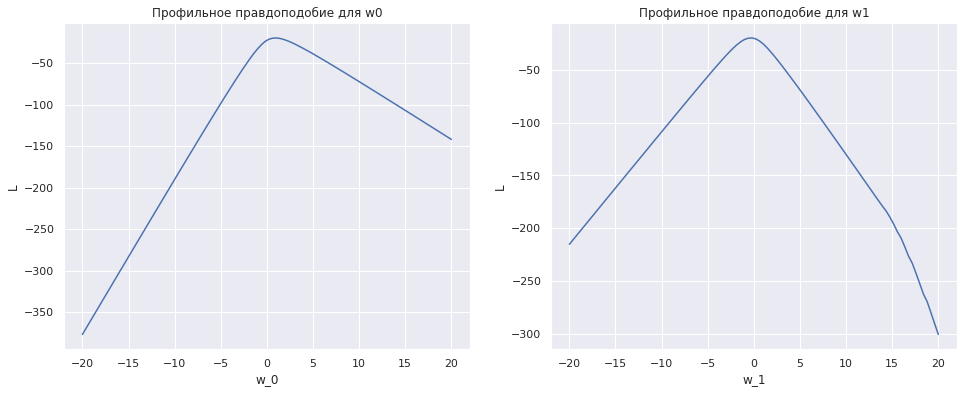

Оптимальные веса: (1.0101010101010104, -0.20202020202020066)


In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(W, w_0)
ax1.set_title('Профильное правдоподобие для w0')
ax1.set_xlabel('w_0')
ax1.set_ylabel('L')

ax2.set_title('Профильное правдоподобие для w1')
ax2.plot(W, w_1)
ax2.set_xlabel('w_1')
ax2.set_ylabel('L')

plt.show()

print("Оптимальные веса:", opt_w)

**Вывод:** К максимуму правдоподобия не получается сойтись

b) Для решения проблемы применяют ругуляризацию правдоподобия Фирта. Проверьте, что такой способ решает проблему из первого пункта.

In [84]:
def firth(X, y, theta, clf):
    pred = clf.predict_proba(X)[:,1]
    W = np.diag(pred * (1 - pred))
    base = likelyhood(X, y, theta)
    return base + np.log(np.linalg.det(X.T.dot(W).dot(X))) / 2

In [85]:
W = np.linspace(-20, 20, 100)
w_0 = []
w_1 = []
opt_w = (0, 0)
best_like = -1000

for i, w in enumerate(W):
    lhood_w0 = []
    lhood_w1 = []
    
    for j, w_m in enumerate(W):
        clf.coef_ = np.array([[w, w_m]])
        lhood = firth(X_train, y_train, np.array([[w, w_m]]), clf)
        if (lhood > best_like):
            opt_w = (w, w_m)
            best_like = lhood
            
        lhood_w0.append(lhood)
        
        clf.coef_ = np.array([[w_m, w]])
        lhood = firth(X_train, y_train, np.array([[w_m, w]]), clf)
        if (lhood > best_like):
            opt_w = (w_m, w)
            best_like = lhood
            
        lhood_w1.append(lhood)

    w_0 = np.append(w_0, np.max(lhood_w0))
    w_1 = np.append(w_1, np.max(lhood_w1))

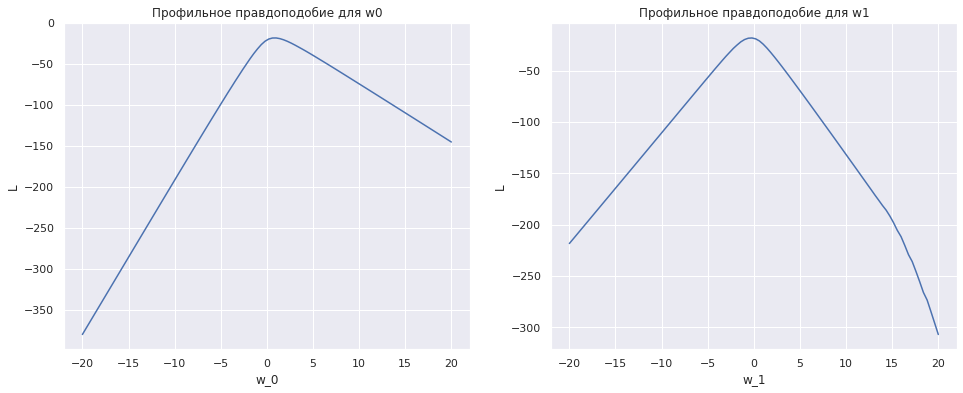

Оптимальные веса: (1.0101010101010104, -0.20202020202020066)


In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(W, w_0)
ax1.set_title('Профильное правдоподобие для w0')
ax1.set_xlabel('w_0')
ax1.set_ylabel('L')

ax2.set_title('Профильное правдоподобие для w1')
ax2.plot(W, w_1)
ax2.set_xlabel('w_1')
ax2.set_ylabel('L')

plt.show()

print("Оптимальные веса:", opt_w)

c) Стандартным решением проблемы полной разделимости данных является получение дополнительного набора данных. Вам удалось получить 23 новых примера, кроме того удалось добавить еще одну переменную - возраст текущего автомобиле. Проверьте, что обычная логистическая регрессия работает в случае зависимости только от дохода. Сравните коэффициенты для обычной и регуляризованной регрессий. 

In [87]:
cars = pd.read_csv('cars.csv', sep='\t')
cars.head()

,purchase,income,age
0,0.0,32.0,3.0
1,0.0,45.0,2.0
2,1.0,60.0,2.0
3,0.0,53.0,1.0
4,0.0,25.0,4.0


In [88]:
X_train = cars.loc[:, ['age', 'income']]
y_train = cars.purchase
logreg = LogisticRegression().fit(X_train, y_train)
print('accuracy: %f' %accuracy_score(y_train, logreg.predict(X_train)))

accuracy: 0.606061


In [89]:
X_train =  cars.income.values.reshape(-1, 1)
X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
y_train = cars.purchase
clf = LogisticRegression().fit(X_train, y_train)
print('accuracy: %f' %accuracy_score(y_train, clf.predict(X_train)))

accuracy: 0.666667


In [90]:
W = np.linspace(-20, 200, 100)
w_0 = []
w_1 = []

for i, w in enumerate(W):
    lhood_w0 = []
    lhood_w1 = []
    
    for j, w_m in enumerate(W):
        lhood = likelyhood(X_train, y_train, np.array([[w, w_m]]))
        lhood_w0.append(lhood)
        
        lhood = likelyhood(X_train, y_train, np.array([[w_m, w]]))
        lhood_w1.append(lhood)

    w_0.append(max(lhood_w0))
    w_1.append(max(lhood_w1))

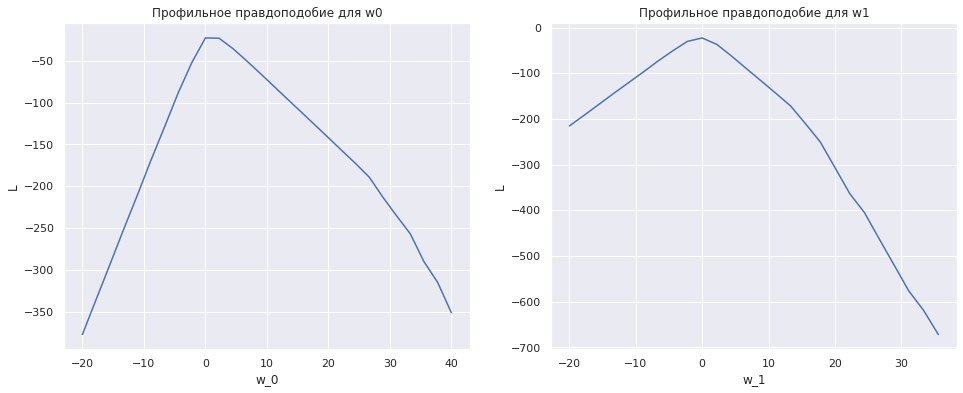

Оптимальные веса: (1.0101010101010104, -0.20202020202020066)


In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(W, w_0)
ax1.set_title('Профильное правдоподобие для w0')
ax1.set_xlabel('w_0')
ax1.set_ylabel('L')

ax2.set_title('Профильное правдоподобие для w1')
ax2.plot(W, w_1)
ax2.set_xlabel('w_1')
ax2.set_ylabel('L')

plt.show()

print("Оптимальные веса:", opt_w)

In [92]:
clf = LogisticRegression(penalty='none', solver = 'sag').fit(X_train, y_train)
clf_new = LogisticRegression().fit(X_train, y_train)
print('Веса без регуляризации: (%f, %f)' %(clf.coef_[0][0], clf.coef_[0][1]))
print('Веса с регуляризацией: (%f, %f)' %(clf_new.coef_[0][0], clf_new.coef_[0][1]))

Веса без регуляризации: (0.915524, -0.160156)
Веса с регуляризацией: (0.781830, -0.149625)


e) Постройте QQ- график остатков модели нормальноо распределения. О чем говорит график? Можно ли его объяснить?


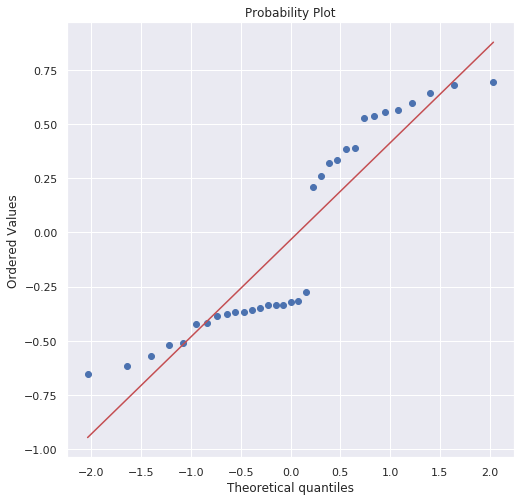

In [93]:
X_train = cars_new[['income', 'age']].values
y_train = cars_new.purchase
clf = LogisticRegression().fit(X_train, y_train)

plt.figure(figsize=(8, 8))
scipy.stats.probplot(y_train - clf.predict_proba(X_train)[:, 1], dist=scipy.stats.norm, plot=plt)
plt.show()

**Вывод:** По графику видно, что модель ошибается и работает довольно таки плохо. Модель часто неуверена в своем решении и предсказывает вероятности около 0.5.